# Plotting Historical Term Frequencies Using the DPLA API
### ...

In [36]:
%pip install requests
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import requests
import matplotlib.pyplot as plt

In [ ]:
email = "YOUR EMAIL GOES HERE"

requests.post(f"https://api.dp.la/v2/api_key/{email}")

In [18]:
DPLA_API_KEY = os.getenv("DPLA_API_KEY")

In [19]:
def get_dpla_counts(search_term, start_year, end_year):
    query = f"q={search_term}&sourceResource.date.after={start_year}&sourceResource.date.before={end_year}&page_size=3"
    
    response = requests.get(f"https://api.dp.la/v2/items?api_key={DPLA_API_KEY}&{query}")
    
    if response.status_code != 200:
        print(f"Response status code: {response.status_code}")
        
    resp_json = response.json()
    total_count = resp_json.get("count")
    
    return total_count

In [20]:
def plot_counts(term, decade_counts):
    decades = list(decade_counts.keys())
    values  = list(decade_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(decades, values, 5, color='blue')
    plt.title(f"DPLA Items by Decade: '{term.capitalize()}'")
    plt.xlabel("Decade")
    plt.ylabel("Number of Items")
    plt.xticks(decades, decades)
    plt.tight_layout()
    plt.show()

In [22]:
def get_counts(term):
    decade_counts_dict = {}
    for decade in range(1800, 2030, 10):
        end_year = decade + 9

        decade_count = get_dpla_counts(term, decade, end_year)
        decade_counts_dict[decade] = decade_count
    
    plot_counts(term, decade_counts_dict)

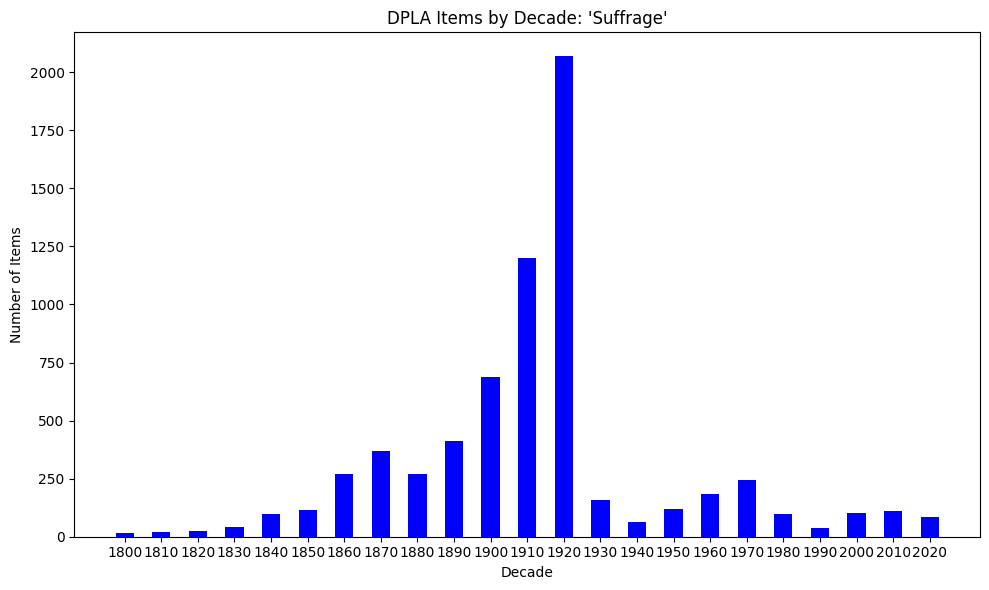

In [ ]:
get_counts("suffrage")

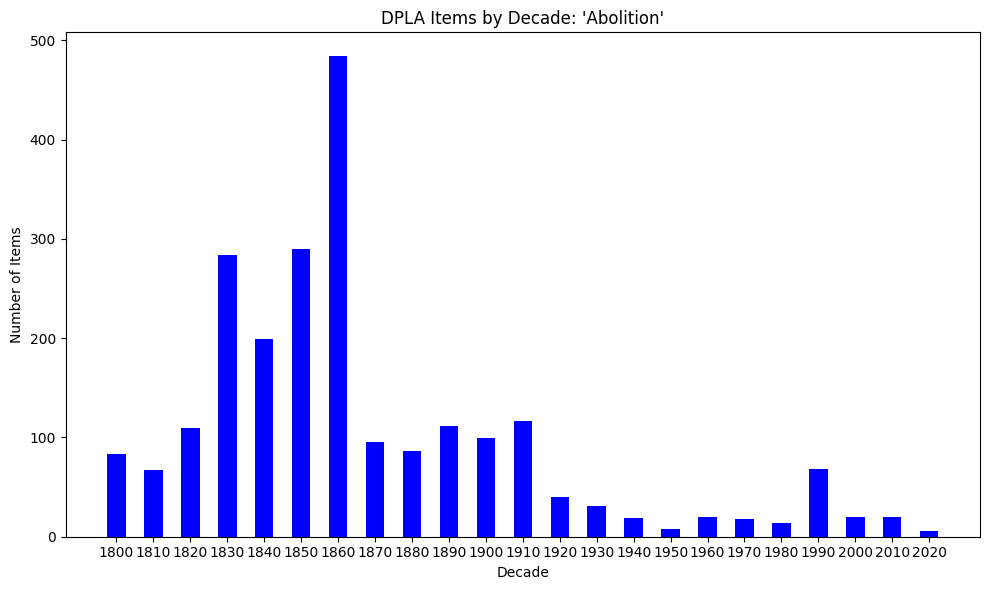

In [35]:
get_counts("abolition")